In [1]:
!pip install pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import pandas as pd

In [3]:
# Plotting functions
def plot(data, n_plots, title="Singular Values", xlabel="Index", ylabel="Value", digit_form=False, reconstruct=False, U=None, E=None, V_t=None):
    if digit_form:
        fig, axes = plt.subplots(1, n_plots, figsize=(n_plots, 1))

        for i in range(n_plots):
            ax = axes[i]
            ax.imshow(data[i].reshape(28, 28), cmap='gray')
            ax.axis('off')

        plt.show()
        return

    if reconstruct:
        singular_values = [1, 5, 50, 100, 300, 500, 784]
        fig, subplots = plt.subplots(1, len(singular_values),  figsize=(len(singular_values) * 2, 2))
        for i in range(len(singular_values)):
            curr_plot = subplots[i]
            
            # Take the first k singular values and vectors
            U_k = U[:, :singular_values[i]]
            E_k = np.diag(E[:singular_values[i]])
            V_k = V_t[:singular_values[i], :]

            # Reconstruct the data
            reconstructed_data = np.dot(U_k, np.dot(E_k, V_k))
            curr_plot.imshow(reconstructed_data[0].reshape(28, 28), cmap='gray')
            curr_plot.set_title(f"{singular_values[i]} Values", loc="center")
        plt.tight_layout()
        return

    if n_plots == 1:
        # Plotting the value vs index of the singular values
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(data)), data, marker='.', linestyle='-')
        plt.title(title + " Linear Plot")
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True)
        plt.show()
        return

    elif n_plots == 2:
        # Plot linear and semi-log
        fig, (graph_1, graph_2) = plt.subplots(1, n_plots, figsize=(20, 5))

        # linear
        graph_1.plot(range(len(data)), data, marker='o', linestyle='-')
        graph_1.set_title(title + " Linear Plot")
        graph_1.set_xlabel(xlabel)
        graph_1.set_ylabel(ylabel)

        # semi-log
        graph_2.semilogy(range(len(data)), data, marker='o', linestyle='-')
        graph_2.set_title(title + " Semi-Log Plot")
        graph_2.set_xlabel(xlabel)
        graph_2.set_ylabel(ylabel)
        plt.tight_layout()
        plt.show()
        return
        
    else:
        return 'invalid'

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

n_train,_,_= x_train.shape
n_test,_,_ = x_test.shape

# Transform into row vectors
x_train_reshaped = x_train.reshape(n_train, -1)
x_test_reshaped = x_test.reshape(n_test, -1)

data_row_vectors= np.concatenate((x_train_reshaped, x_test_reshaped), axis=0)

data_row_vectors.shape


(70000, 784)

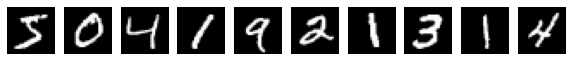

In [5]:
plot(data=data_row_vectors, n_plots=10, digit_form=True)


In [6]:
U, E, Vt = np.linalg.svd(data_row_vectors, full_matrices=False)

print('U shape: ', U.shape)
print('E shape: ', E.shape)
print('Vt shape: ', Vt.shape)

U shape:  (70000, 784)
E shape:  (784,)
Vt shape:  (784, 784)


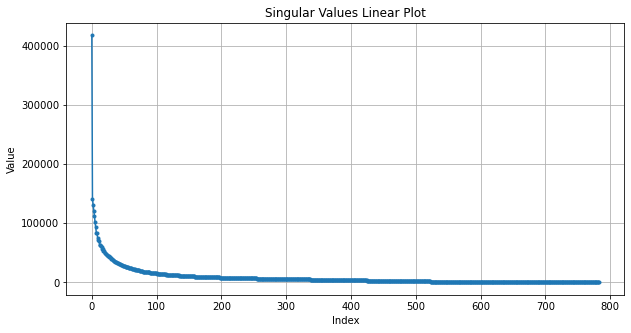

In [7]:
plot(data=E, n_plots=1)

In [8]:
nonlin_transform_row_vectors = np.empty_like(data_row_vectors)
np.seterr(divide = 'ignore') 
for i in range(data_row_vectors.shape[0]):
    nonlin_transform_row_vectors[i] = np.log(data_row_vectors[i])  # x transform
    nonlin_transform_row_vectors[i] = np.log(data_row_vectors[i]) # y transform
print('nonlin transform data shape: ', nonlin_transform_row_vectors.shape)
%store nonlin_transform_row_vectors

nonlin transform data shape:  (70000, 784)
Stored 'nonlin_transform_row_vectors' (ndarray)


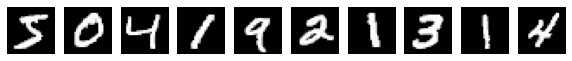

In [9]:
plot(data=nonlin_transform_row_vectors, n_plots=10, digit_form=True)

In [10]:
U_nonlin_transform, E_nonlin_transform, Vt_nonlin_transform = np.linalg.svd(nonlin_transform_row_vectors, full_matrices=False)

print('U matrix shape: ', U_nonlin_transform.shape)
print('E matrix shape: ', E_nonlin_transform.shape)
print('V transpose matrix shape: ', Vt_nonlin_transform.shape)

U matrix shape:  (70000, 784)
E matrix shape:  (784,)
V transpose matrix shape:  (784, 784)


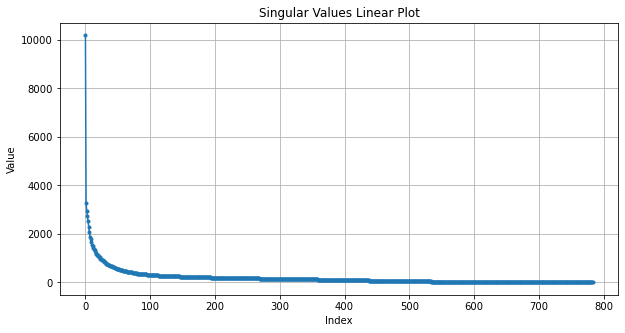

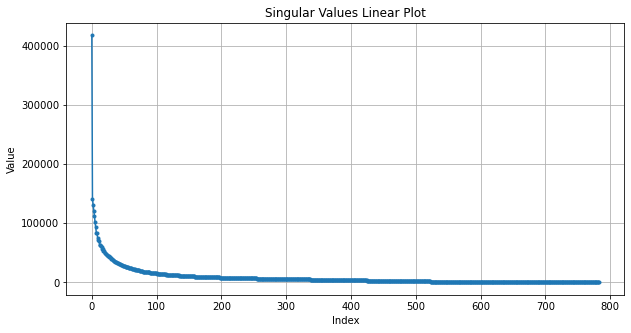

In [11]:
plot(data=E_nonlin_transform, n_plots=1)
plot(data=E, n_plots=1)